4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 9s 30ms/step - loss: 0.4142 - val_loss: 0.3430
Epoch 2/50
235/235 [==============================] - 7s 30ms/step - loss: 0.3277 - val_loss: 0.3201
Epoch 3/50
235/235 [==============================] - 7s 29ms/step - loss: 0.3123 - val_loss: 0.3093
Epoch 4/50
235/235 [==============================] - 3s 12ms/step - loss: 0.3030 - val_loss: 0.3013
Epoch 5/50
235/235 [==============================] - 3s 13ms/step - loss: 0.2965 - val_loss: 0.2962
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2923 - val_loss: 0.2932
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.2897 - val_loss: 0.2911
Epoch 8/50
235/235 [==============================] - 2s 11ms/step - loss: 0.2881 - val_loss: 0.2898
Epoch 9/50
235/235 [==============================] - 3s 13ms/step - loss: 0.2870 - val_loss: 0.2888
Epoch 10/50
235/235 [=======

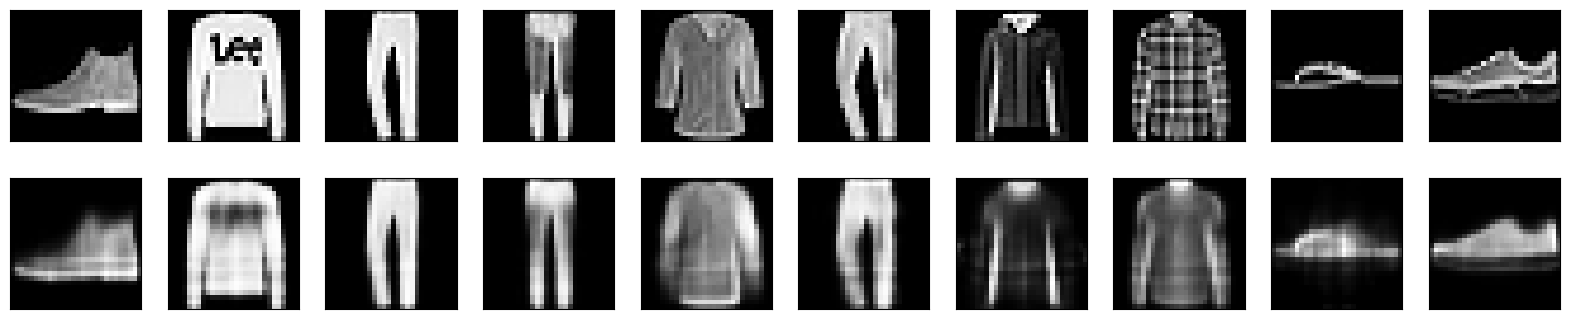

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist  # Import Fashion MNIST dataset

# Load the Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images for the autoencoder
x_train_flat = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_flat = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder model
encoding_dim = 32  # Size of the encoded representations
input_img = Input(shape=(x_train_flat.shape[1],))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(x_train_flat.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train_flat, x_train_flat, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test_flat, x_test_flat))

# Create a separate encoder model
encoder = Model(input_img, encoded)

# Encode the test images
encoded_imgs = encoder.predict(x_test_flat)

# Decode the encoded images
decoded_imgs = autoencoder.predict(x_test_flat)

# Display original and reconstructed images
n = 10  # Number of samples to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])  # Assuming your dataset is in image format
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(x_test.shape[1:]))  # Assuming your dataset is in image format
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
